In [1]:
!pip install gdown


In [3]:
import gdown

url = "https://drive.google.com/uc?id=1XXgJNTEl4p4APOAYsDXEFEk9XX-8lg07"
gdown.download(url, "accidents.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1XXgJNTEl4p4APOAYsDXEFEk9XX-8lg07
From (redirected): https://drive.google.com/uc?id=1XXgJNTEl4p4APOAYsDXEFEk9XX-8lg07&confirm=t&uuid=afeb882c-81d1-4cb3-84ff-952d2acd6209
To: /content/accidents.csv
100%|██████████| 3.06G/3.06G [00:44<00:00, 69.1MB/s]


'accidents.csv'

In [5]:
import pandas as pd

chunks = pd.read_csv("/content/accidents.csv", chunksize=200000)
us_accident_df = pd.concat(chunks)

### Assignment-1

1. How many unique values are there in categorical columns like `City`, `State`, and `Weather_Condition`? Which category is the most frequent in each?

In [6]:
print("unique cities:",us_accident_df['City'].nunique())
print("unique states:",us_accident_df['State'].nunique())
print("unique weather conditions:",us_accident_df['Weather_Condition'].nunique())


unique cities: 13678
unique states: 49
unique weather conditions: 144


In [10]:
print("most frequent city:",us_accident_df['City'].mode()[0])
print("frequent count:",us_accident_df['City'].value_counts().iloc[0])

print("most frequent weather:",us_accident_df['Weather_Condition'].mode()[0])
print("frequent count:",us_accident_df['Weather_Condition'].value_counts().iloc[0])

print("most frequent state:",us_accident_df['State'].mode()[0])
print("frequent count:",us_accident_df['State'].value_counts().iloc[0])

most frequent city: Miami
frequent count: 186917
most frequent weather: Fair
frequent count: 2560802
most frequent state: CA
frequent count: 1741433


2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [12]:
missing_values=(us_accident_df.isnull().sum()/us_accident_df.shape[0])*100
print(missing_values)
print("columns with more than 5% missing data:")
print(missing_values[missing_values>5])

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

3. Convert `Start_Time` and `End_Time` columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [15]:
us_accident_df['Start_Time']=pd.to_datetime(us_accident_df['Start_Time'],errors='coerce')
us_accident_df['End_Time']=pd.to_datetime(us_accident_df['End_Time'],errors='coerce')
print("earliest accident start time:")
print(us_accident_df['Start_Time'].min())
print("latest accident start time:")
print(us_accident_df['Start_Time'].max())


earliest accident start time:
2016-01-14 20:18:33
latest accident start time:
2023-03-31 23:30:00


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [17]:
duplicates=us_accident_df.duplicated().sum()
print("duplicates:",duplicates)  # no duplicates exist
removed_duplicates=us_accident_df.drop_duplicates()
print("after_removing_duplicates:")
print(removed_duplicates)

duplicates: 0
after_removing_duplicates:
                ID   Source  Severity          Start_Time            End_Time  \
0              A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1              A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2              A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3              A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4              A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07   
...            ...      ...       ...                 ...                 ...   
7728389  A-7777757  Source1         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
7728390  A-7777758  Source1         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
7728391  A-7777759  Source1         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
7728392  A-7777760  Source1         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
7728393  A-7777761  Source1         2 2019-08-23 18:52:06 2019-08-23

5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

In [18]:
severity_percentage = (us_accident_df['Severity'].value_counts(normalize=True) * 100).round(2)
print(severity_percentage)


Severity
2    79.67
3    16.81
4     2.65
1     0.87
Name: proportion, dtype: float64


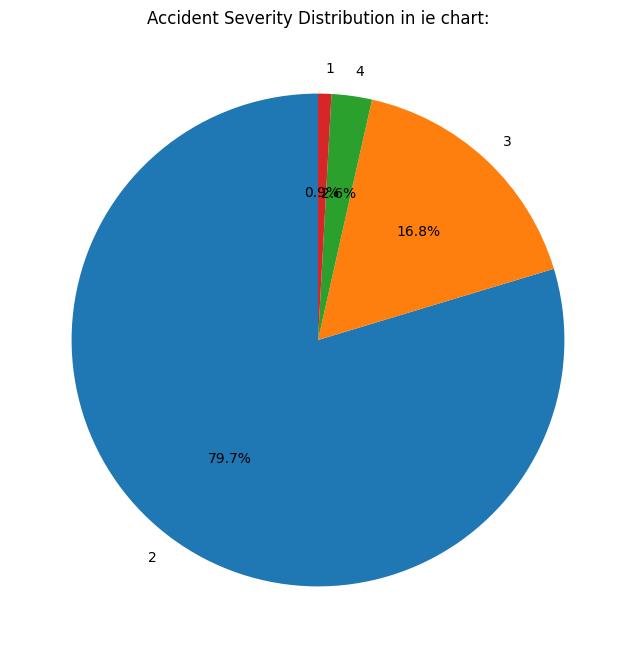

In [19]:
import matplotlib.pyplot as plt
severity_counts = us_accident_df['Severity'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Accident Severity Distribution in ie chart:")
plt.show()
